In [126]:
# import wykorzystywanych bibliotek
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# importowanie csv do ramki danych
googleplaystore = pd.read_csv('googleplaystore.csv')
googleplaystore['Size'] = googleplaystore['Size'].str.replace("M","")
googleplaystore['Installs'] = googleplaystore['Installs'].str.replace(",","")
googleplaystore['Installs'] = googleplaystore['Installs'].str.replace("+","")
googleplaystore.head(1000)


C:\Users\Waweł\AppData\Local\Temp\ipykernel_15516\618173474.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  googleplaystore['Installs'] = googleplaystore['Installs'].str.replace("+","")


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,My Talking Pet,ENTERTAINMENT,4.6,6238,Varies with device,100000,Paid,$4.99,Everyone,Entertainment,"June 30, 2018",Varies with device,Varies with device
996,Funny Pics,ENTERTAINMENT,3.9,9941,Varies with device,1000000,Free,0,Teen,Entertainment,"July 7, 2017",Varies with device,Varies with device
997,Funny Quotes Free,ENTERTAINMENT,4.2,23666,3.6,1000000,Free,0,Teen,Entertainment,"May 4, 2018",8.1,4.0 and up
998,LOL Pics (Funny Pictures),ENTERTAINMENT,4.4,67554,7.7,1000000,Free,0,Teen,Entertainment,"September 15, 2015",4.0,2.3.3 and up


In [127]:
# analiza danych statystycznych
print(googleplaystore.describe())
print(googleplaystore.info())
print(googleplaystore.isnull().values.any())


            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 

<AxesSubplot:>

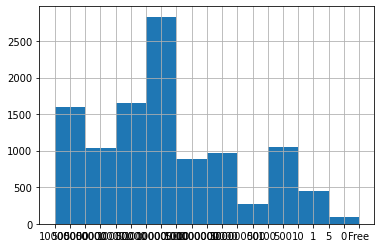

In [128]:
# rozkład płci

googleplaystore['Installs'].hist()

<AxesSubplot:>

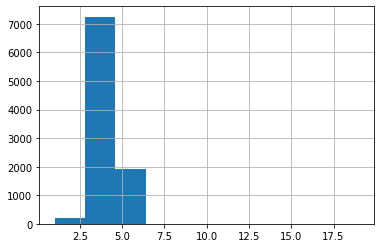

In [129]:
# rozkład "ocalałych"

googleplaystore['Rating'].hist()

In [130]:
# rozkład danych z uwzglednieniem wieku
#passengers['Age'].plot.box() 

googleplaystore['Reviews'] = pd.to_numeric(googleplaystore['Reviews'], errors='coerce')
googleplaystore['Installs'] = pd.to_numeric(googleplaystore['Installs'], errors='coerce')
googleplaystore['Size'] = pd.to_numeric(googleplaystore['Size'], errors='coerce')

googleplaystore = googleplaystore.replace(np.nan, 0, regex=True)

print(googleplaystore.describe())
print(googleplaystore.info())
print(googleplaystore.isnull().values.any())

             Rating       Reviews          Size      Installs
count  10841.000000  1.084100e+04  10841.000000  1.084100e+04
mean       3.623190  4.441119e+05     18.137312  1.546291e+07
std        1.521678  2.927629e+06     22.180798  8.502557e+07
min        0.000000  0.000000e+00      0.000000  0.000000e+00
25%        3.700000  3.800000e+01      2.600000  1.000000e+03
50%        4.200000  2.094000e+03      9.200000  1.000000e+05
75%        4.500000  5.476800e+04     26.000000  5.000000e+06
max       19.000000  7.815831e+07    100.000000  1.000000e+09
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  float64
 4   Size            10841 non-null  float64
 5   Installs     

In [131]:
#2. usuwanie nieprzydatnych danych
googleplaystore.drop(['Last Updated','App', 'Category','Current Ver', 'Android Ver','Price','Type','Content Rating','Genres'], axis=1, inplace = True)
googleplaystore

,Rating,Reviews,Size,Installs
0,4.1,159.0,19.0,10000.0
1,3.9,967.0,14.0,500000.0
2,4.7,87510.0,8.7,5000000.0
3,4.5,215644.0,25.0,50000000.0
4,4.3,967.0,2.8,100000.0
...,...,...,...,...
10836,4.5,38.0,53.0,5000.0
10837,5.0,4.0,3.6,100.0
10838,0.0,3.0,9.5,1000.0
10839,4.5,114.0,0.0,1000.0


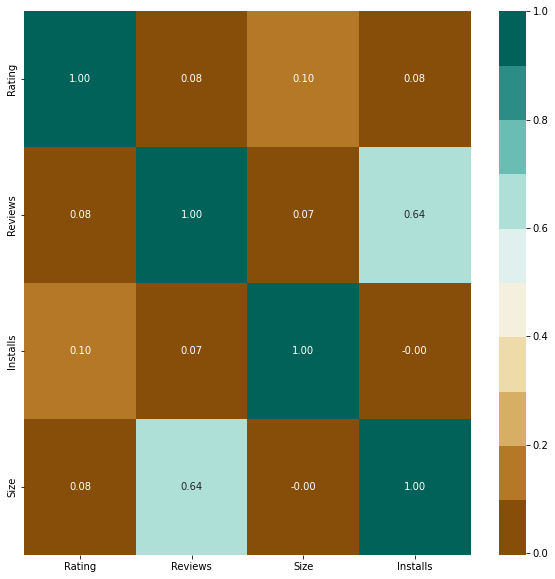

In [132]:
# wyznaczenie macierzy korelacji

correlations = googleplaystore.corr()
fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")
ax.set_yticklabels(['Rating','Reviews','Installs','Size']);

plt.show()


# Variable	Definition	Key
# survival 	Survival 	0 = No, 1 = Yes
# pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
# sex 	Sex 	
# Age 	Age in years 	
# sibsp 	# of siblings / spouses aboard the Titanic 	
# parch 	# of parents / children aboard the Titanic 	
# ticket 	Ticket number 	
# fare 	Passenger fare 	
# cabin 	Cabin number 	
# embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

In [133]:
# uzupełnienie pustych wartości
googleplaystore.fillna(googleplaystore.mean(), inplace=True)
googleplaystoreCopy = googleplaystore.copy()

In [134]:
# zbiór danych
X = googleplaystore.drop('Rating', axis=1).to_numpy()
X

array([[1.59000e+02, 1.90000e+01, 1.00000e+04],
       [9.67000e+02, 1.40000e+01, 5.00000e+05],
       [8.75100e+04, 8.70000e+00, 5.00000e+06],
       ...,
       [3.00000e+00, 9.50000e+00, 1.00000e+03],
       [1.14000e+02, 0.00000e+00, 1.00000e+03],
       [3.98307e+05, 1.90000e+01, 1.00000e+07]])

In [135]:
# zbiór etykiet
y = googleplaystore.loc[:, 'Rating'].to_numpy()
y

array([4.1, 3.9, 4.7, ..., 0. , 4.5, 4.5])

In [136]:
# podział zbioru na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345) 

In [145]:
# uniwersalna metoda do trenowania i oceny modeli

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # trenuj model
    classifier.fit(feature_vector_train, label)
    
    # wygeneruj przewidywania modelu dla zbioru testowego
    predictions = classifier.predict(feature_vector_valid)
    
    # dokonaj ewaluacji modelu na podstawie danych testowych
    scores = list(metrics.precision_recall_fscore_support(predictions, y_test))
    score_vals = [
        scores[0][0],
        scores[1][0],
        scores[2][0]
    ]
    score_vals.append(metrics.accuracy_score(predictions, y_test))
    return score_vals

In [138]:
# MODEL 1 - regresja logistyczna 
accuracy = train_model(linear_model.LogisticRegression(), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

ValueError: Unknown label type: 'continuous'

In [139]:
# MODEL 2 - Support Vector Machine
accuracy = train_model(svm.SVC(), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM" , accuracy)

ValueError: Unknown label type: 'continuous'

In [140]:
# MODEL 3 - Random Forest Tree 
accuracy = train_model(ensemble.RandomForestClassifier(), X_train, y_train, X_test)
accuracy_compare['RF'] = accuracy
print ("RF: ", accuracy)

ValueError: Unknown label type: 'continuous'

In [142]:
# porównanie modeli

df_compare = pd.DataFrame(accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy'])
df_compare.plot(kind='bar')

NameError: name 'accuracy_compare' is not defined

In [143]:
# działania korygujące - zastosowanie sieci neuronowej

# MODEL 4 - neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
accuracy = train_model(mlp, X_train, y_train, X_test)
accuracy_compare['neural network'] = accuracy
print ("neural network" , accuracy)

ValueError: Unknown label type: (array([4.2, 4.1, 4.9, ..., 3.7, 4.7, 4.3]),)

In [ ]:
#0.979381443298969, 0.7509881422924901, 0.8501118568232662, 0.7442748091603053]

In [144]:
# działania korygujące - hiperparametry

# MODEL 5 - Support Vector Machine
accuracy = train_model(svm.SVC(gamma='auto'), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM gamma='auto'" , accuracy)

# MODEL 6 - Support Vector Machine
accuracy = train_model(svm.SVC(kernel='sigmoid'), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM kernel='sigmoid'" , accuracy)

# MODEL 7 - Support Vector Machine
accuracy = train_model(svm.SVC(degree=4), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM degree=4" , accuracy)

ValueError: Unknown label type: 'continuous'